<a href="https://colab.research.google.com/github/lavish1551/Machine-Learning-Projects/blob/main/Marketing_Campaign_Response_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age  Income  PreviousPurchases  EmailClicks  Response
0   25   30000                  1            2         0
1   35   50000                  3            4         1
2   45   70000                  5            6         1
3   23   25000                  0            1         0
4   36   52000                  2            3         1

Dataset Info:
              Age        Income  PreviousPurchases  EmailClicks   Response
count  10.000000     10.000000              10.00        10.00  10.000000
mean   36.500000  52200.000000               3.00         4.00   0.700000
std     9.766724  19332.183874               2.00         2.00   0.483046
min    23.000000  25000.000000               0.00         1.00   0.000000
25%    29.250000  36000.000000               1.25         2.25   0.250000
50%    35.500000  51000.000000               3.00         4.00   1.000000
75%    43.750000  68000.000000               4.75         5.75   1.000000
max    52.000000  80000.000000               6.00 

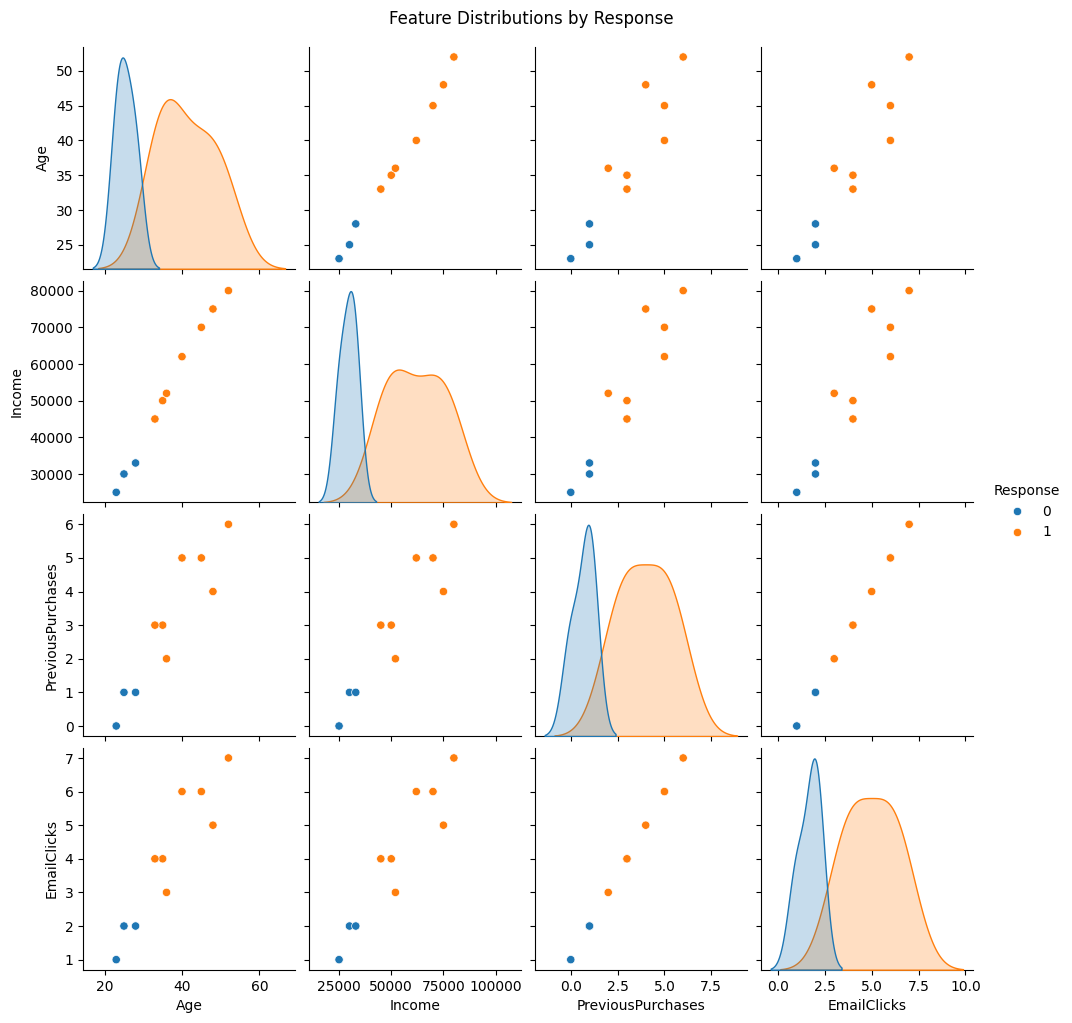

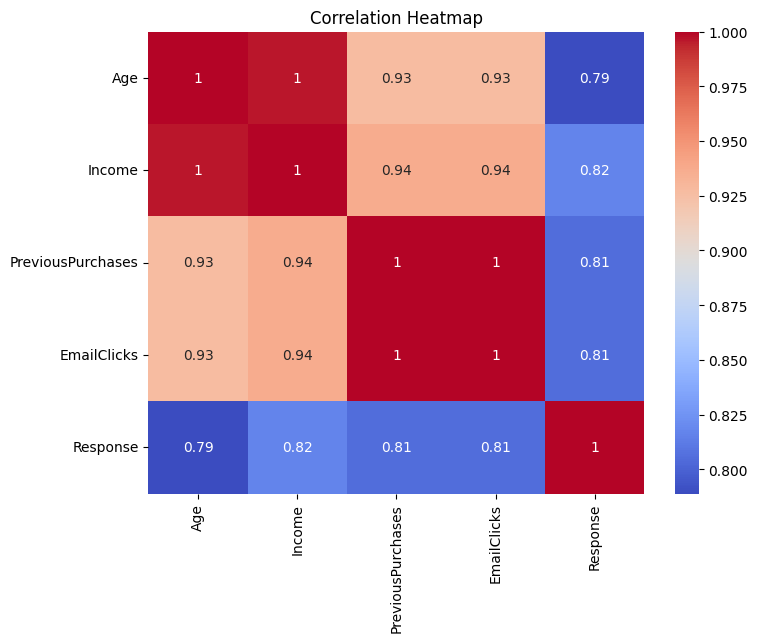

<ipython-input-1-be45b72c706c>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=df, palette='Set2')


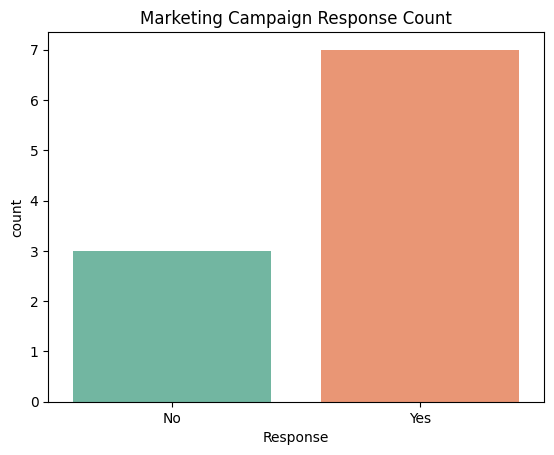

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter 

✅ Accuracy: 1.0

📊 Confusion Matrix:
 [[3]]

📄 Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



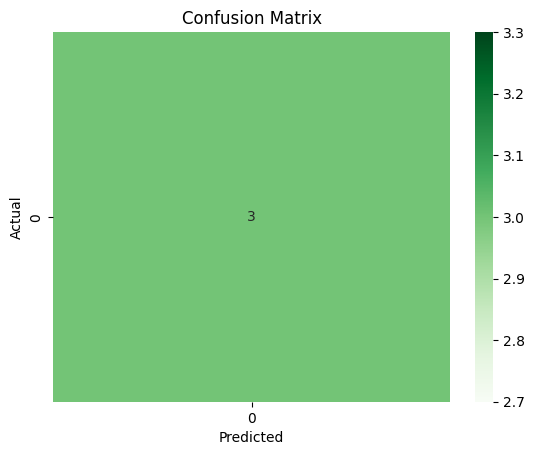

In [1]:
# Step 1: Install packages (if needed)
# !pip install pandas numpy seaborn matplotlib scikit-learn

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 3: Sample Dataset (or load your own CSV)
data = {
    'Age': [25, 35, 45, 23, 36, 52, 28, 48, 33, 40],
    'Income': [30000, 50000, 70000, 25000, 52000, 80000, 33000, 75000, 45000, 62000],
    'PreviousPurchases': [1, 3, 5, 0, 2, 6, 1, 4, 3, 5],
    'EmailClicks': [2, 4, 6, 1, 3, 7, 2, 5, 4, 6],
    'Response': [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]  # Target variable
}

df = pd.DataFrame(data)

# Step 4: Explore the data
print(df.head())
print("\nDataset Info:\n", df.describe())

# Step 5: Visualizations
sns.pairplot(df, hue='Response')
plt.suptitle("Feature Distributions by Response", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Response count
sns.countplot(x='Response', data=df, palette='Set2')
plt.title("Marketing Campaign Response Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Step 6: Prepare data
X = df[['Age', 'Income', 'PreviousPurchases', 'EmailClicks']]
y = df['Response']

# Step 7: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 9: Predict and Evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()